# Diffrazione degli elettroni

Quadernetto per analisi dati dell'esperimento della diffrazione degli elettroni. Quaderno scaricabile disponibile [qui](https://scarsi.web.cern.ch/INSULAB/fisicaModerna/diffrazoneElettroni.ipynb)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

Inserire in queste celle SOLO in corrispondenza delle linee precedute da `>>>` i valori
- Le tensioni vanno espresse in Volt
- I diametri ed i relativi errori vanno espressi in mm (per comodità). A fine riga vengono convertiti in metri, per lavorare solo con unità del sistema internazionale

ATTENZIONE: il righello graduato non è in centimetri bensì in millimetri

In [2]:
# >>> Tensioni impostate
Tensioni = np.array((3000, 3500, 4000, 4500, 5000)) # V

# Calcolo la radice dell'inverso
TensioniInvRad = Tensioni ** (-1/2)

# >>> Valori misurati per i diametri (in mm)
Diametro1 = np.array((34.57, 32, 31, 29, 28)) * 1e-3 # m
Diametro2 = np.array((27, 25, 25, 23, 22)) * 1e-3 # m

# >>> Errori sulle misure (in mm)
err1 = np.array((1, 1, 1, 1, 1, )) * 1e-3 # m
err2 = np.array((1, 1, 1, 1, 1, )) * 1e-3 # m



# Costanti naturali
L = 0.13 # m
h = 6.63e-34 # J s
m = 9.11e-31 # kg
e = 1.60e-19 # C


Qui viene eseguito il plot dei dati sperimentali ed il fit con una retta

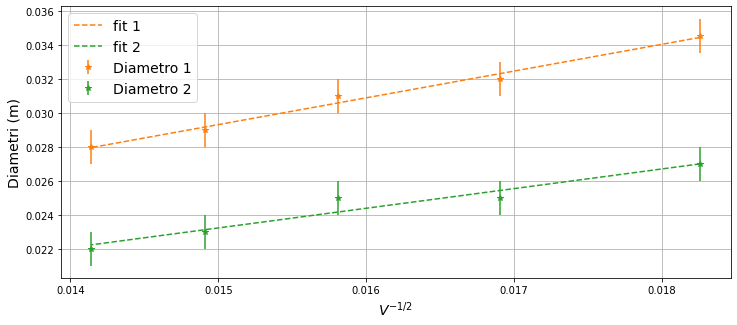

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

ax.errorbar(TensioniInvRad, Diametro1, yerr = err1, marker = "*", ls = "", 
            label = "Diametro 1", c = "tab:orange")
ax.errorbar(TensioniInvRad, Diametro2, yerr = err1, marker = "*", ls = "", 
            label = "Diametro 2", c = "tab:green")

# Faccio il fit lineare
def myLine(x, m, q):
    return m*x + q

popt1, pcov1 = curve_fit(myLine, TensioniInvRad, Diametro1, sigma = err1, absolute_sigma = True)
popt2, pcov2 = curve_fit(myLine, TensioniInvRad, Diametro2, sigma = err2, absolute_sigma = True)

ax.plot(TensioniInvRad, myLine(TensioniInvRad, *popt1), ls = "--", 
        c = "tab:orange", label = "fit 1")
ax.plot(TensioniInvRad, myLine(TensioniInvRad, *popt2), ls = "--", 
        c = "tab:green",  label = "fit 2")



ax.set_xlabel("$V^{-1/2}$", fontsize = 14)
ax.set_ylabel("Diametri (m)", fontsize = 14)


ax.grid()
ax.legend(fontsize = 14)

plt.show()

Questa cella permette di calcolare la distanza interatomica a partire dalle costanti naturali e dalla slope ricavata mediante fit

In [4]:
def distInteratom(slope):
    return 2*L*h / (slope * np.sqrt(2*m*e))

print(f"La distanza interatomica per il primo set di dati vale {distInteratom(popt1[0])*1e9:.2e} nm")
print(f"La distanza interatomica per il secondo set di dati vale {distInteratom(popt2[0])*1e9:.2e} nm")

La distanza interatomica per il primo set di dati vale 2.02e-01 nm
La distanza interatomica per il secondo set di dati vale 2.75e-01 nm
